## Ejercicio 3. 

Nos piden aplicar las funciones para:

***[1]***: Calcular el autovector asociado al autovalor más chico de la matríz L.

***[2]***: Calcular el autovector asociado al autovalor más grande de R.

Además, interpretar los valores que nos dan en términos del grafo.

También nos piden calcular los vectores ***s*** asociados a estos autovectores y comparar con la particion esperada con el grafo de ejemplo.


In [1]:
import numpy as np
from linalg import *

np.random.seed(42)

In [2]:
# Grafo de ejemplo
A_sample = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 1, 1, 0]
])

# Función para obtener el vector s
comunidades = lambda autovector: [1 if x > 0 else -1 for x in autovector] 

***[1]*** Calculamos el autovector asociado al segundo autovalor más chico de L ($\lambda>0$)

Este $\lambda_{min}$ esta asociado a un autovector $v_{min} \in \Re^{N}$ que se interpreta como.
$$\begin{cases}
    sign(v_i) = 1 & \text{ si museo}_i \in \text{comunidadA} \\
    sign(v_i) = -1 & \text{ si museo}_i \in \text{comunidadB} \\
\end{cases}$$ 

***N***: cantidad de museos

In [3]:
L_sample = calcula_L(A_sample)
segundo_autovalor_minimo_L, segundo_autovector_minimo_L = metpotI2(L_sample, mu=1e-5)

print("Segundo autovalor mínimo de L:", segundo_autovalor_minimo_L)
print("Comunidades (s): ", comunidades(segundo_autovector_minimo_L))

Segundo autovalor mínimo de L: 9.999999999919938e-06
Comunidades (s):  [-1, -1, -1, -1, 1, 1, 1, 1]


***[2]***: Calcular el autovector asociado al autovalor más grande de R.

Este $\lambda_{max}$ esta asociado a un autovector $v_ \in \Re^{N}$ que se interpreta como.
$$\begin{cases}
    sign(v_i) = 1 & \text{ si museo}_i \in \text{comunidadA} \\
    sign(v_i) = -1 & \text{ si museo}_i \in \text{comunidadB} \\
\end{cases}$$ 

In [4]:
R_sample = calcula_R(A_sample)
autovalor_maximo_R, autovector_maximo_R = metpot(R_sample)

print("Autovalor máximo para R:", autovalor_maximo_R)
print("Comunidades (s): ", comunidades(autovector_maximo_R))

Autovalor máximo para R: 2.9999999999894005
Comunidades (s):  [1, 1, 1, 1, -1, -1, -1, -1]


Vemos que los resultados de calcular el autovector máximo de R y el segundo autovalor minimo de L nos dan una distribucion de comunidades exactamente igual, como nos muestra aca la figura

[![Comunidades](img/image.png)](img/image.png)


Vemos que esta es la particion esperada que nos muestran en la consigna.

# 3c
Veamos los resultados de aplicar el laplaciano y modularidad al grafo de ejemplo

In [5]:
resultado_laplaciano = laplaciano_iterativo(A_sample, niveles=1)

resultado_modularidad = modularidad_iterativo(A_sample)

printeable_laplaciano = [[int(x) for x in sublista] for sublista in resultado_laplaciano]
printeable_modularidad = [[int(x) for x in sublista] for sublista in resultado_modularidad]

print(f"Laplaciano: {printeable_laplaciano}")
print(f"Modularidad: {printeable_modularidad}")

Laplaciano: [[0, 1, 2, 3], [4, 5, 6, 7]]
Modularidad: [[4, 5, 6, 7], [0, 1, 2, 3]]


Vemos que los resultados son los mismos para ambos, que es la particion esperada. 
En el caso del laplaciano le pasamos solamente un nivel pues corresponde con la cantidad de particiones que esperamos.
Vemos que ambas comunidades generadas dan el mismo resultado que en la figura de arriba.

## Ejercicio 4.

In [6]:
import geopandas as gpd 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import networkx as nx
from template_funciones import * 

In [7]:
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()
M = [3, 5, 10, 50]

def construir_grafo(A):
    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
    return G, G_layout

In [8]:
def graficar_particion(A, comunidades, titulo, ax):
    # Graficamos los barrios
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=ax)

    # Construimos el grafo
    G, G_layout = construir_grafo(A)

    # Generamos colores para las particiones
    colores = plt.cm.Set1(np.linspace(0, 1, len(comunidades)))

    # Creamos el diccionario de colores para cada nodo
    node_colors = {}
    for i, particion in enumerate(comunidades):
        for nodo in particion:
            node_colors[nodo] = colores[i]

    # Creamos la lista de colores en el orden de los nodos del grafo
    node_color_list = [node_colors.get(nodo, 'lightgray') for nodo in G.nodes()]

    # Dibujamos el grafo con colores por partición
    nx.draw_networkx_nodes(G, G_layout, 
                            node_color=node_color_list, 
                            node_size=100, 
                            alpha=0.8, 
                            ax=ax)
    
    # legend_elements = [Line2D([0], [0], marker='o', color='w', 
    #                             markerfacecolor=colores[i], markersize=10, 
    #                             label=f'Partición {i+1}')
    #                     for i in range(len(comunidades))]
    # ax.legend(handles=legend_elements, loc='upper right')

    ax.set_title(titulo, fontsize=16)


#### Particiones óptimas calculadas con el método de modularidad:

/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:68: RuntimeWarning: divide by zero encountered in matmul
  Q = 1 / (4 * n_aristas) * s.T @ R @ s
/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:68: RuntimeWarning: overflow encountered in matmul
  Q = 1 / (4 * n_aristas) * s.T @ R @ s
/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:68: RuntimeWarning: invalid value encountered in matmul
  Q = 1 / (4 * n_aristas) * s.T @ R @ s
/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:83: RuntimeWarning: divide by zero encountered in matmul
  Ax = M @ anterior
/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:83: RuntimeWarning: overflow encountered in matmul
  Ax = M @ anterior
/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:83: RuntimeWarning: invalid value encountered in matmul
  Ax = M @ anterior
/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:96: RuntimeWarning: divide by zero encountered in matmul
  autovalor = autovector.T @ M @ autovector  # <-- cociente de Rayleigh
/Users/pedranji/Projects/ALC-tp1/t

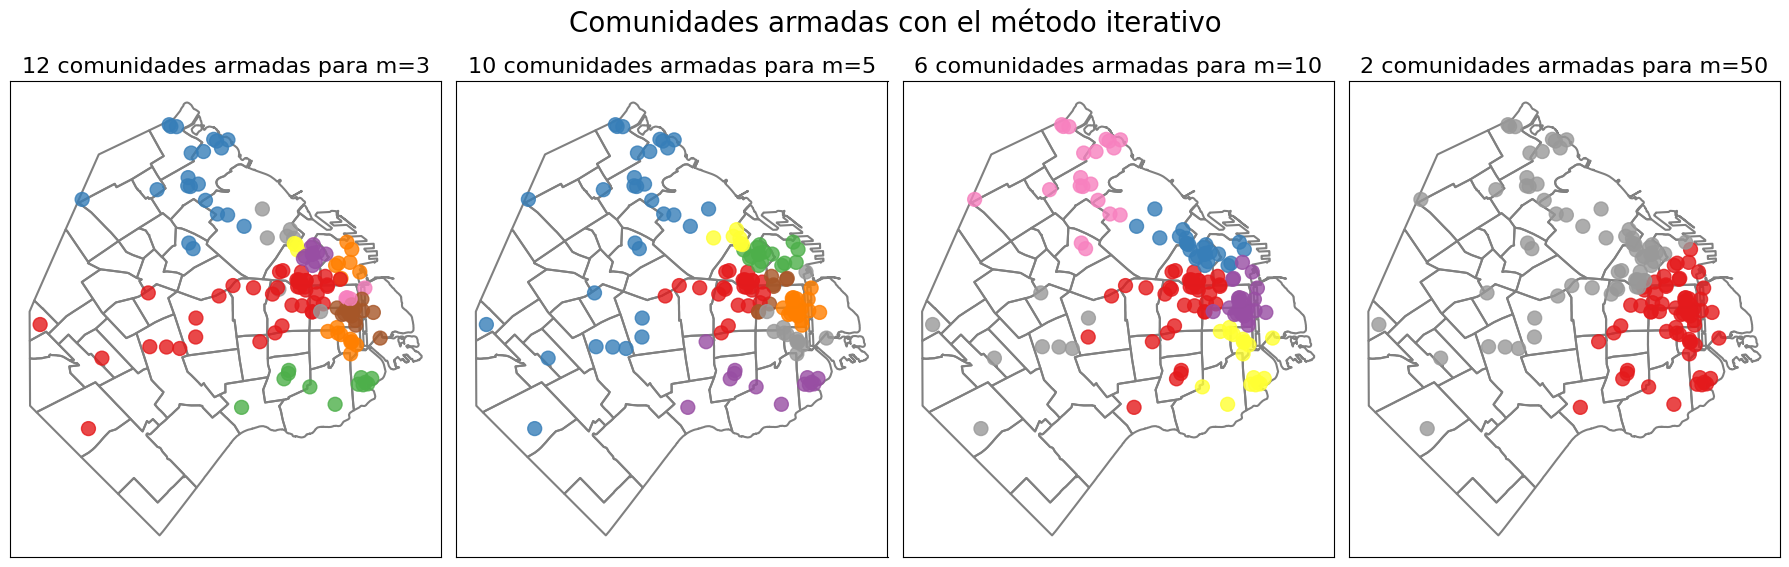

In [9]:
fig, axes = plt.subplots(1, len(M), figsize=(18, 6))

for i, m in enumerate(M):
    A = simetrizar_A(construye_adyacencia(D, m))
    comunidades = modularidad_iterativo(A)
    numero_de_comunidades = len(comunidades)
    graficar_particion(A, comunidades, titulo=f"{numero_de_comunidades} comunidades armadas para m={m}", ax=axes[i])

plt.suptitle("Comunidades armadas con el método iterativo", fontsize=20)
plt.tight_layout()
plt.show()

### <u> Análisis de modularidad </u>:

Vemos algunas zonas estables:
- Los museos de la zona de **La Boca, Barracas** se mantienen en todos los valores de `m`. 
- La comunidad de **Núñez, Belgrano, Coghlan, Saavedra, Villa Urquiza y Colegiales** se mantiene siempre. La zona de Palermo actua como separador, algunos museos de la zona norte de palermo terminan perteneciendo a los barrios mencionados antes y en otras iteraciones se junta con otro bloque o pasa a la zona de **Recoleta**
- La zona mas dispersa de museos tambien se mantiene unida en todas las iteraciones. Esto incluye los museos de la zona oeste de la ciudad, los que estan en los barrios de **Mataderos, Villa Real, Villa Luro, Flores, Villa Gral. Mitre**. Hay un museo en caballito que en la iteracion `m=10` se separa y pasa a pertenecer a una comunidad mas cercana a la zona de **Almagro, Balvanera, Recoleta, San Nicolas, etc.**. Esta ultima comunidad tambien permanece en las iteraciones, aunque con algunos cambios. Por ejemplo, con `m=50` la comunidad gris toma cierta parte de esa interseccion **Recoleta, San Nicolas, Balvanera**.


Observamos también que el número de comunidades se reduce drásticamente al aumentar el $m$ y, por consecuencia, el espacio que ocupa cada comunidad es más grande. Esto es porque aumentar el $m$ con el cual armamos la matríz A encuentra relaciones entre museos más distantes. Por ejemplo, con $m=50$ hay un museo en Nueva Pompeya conectado con un museo de Recoleta.



#### Particiones óptimas calculadas con el método de Laplaciano:

Como la convergencia de este método se define por cantidad de niveles y vemos que el método iterativo tiene distintos numeros de comunidades para cada `m`, armamos una lista de `niveles` que acerque el numero de comunidades lo mas posible a los resultados del método iterativo, asi tienen sentido las comparaciones.



/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:138: RuntimeWarning: divide by zero encountered in matmul
  return U_inversa @ L_inversa
/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:138: RuntimeWarning: overflow encountered in matmul
  return U_inversa @ L_inversa
/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:138: RuntimeWarning: invalid value encountered in matmul
  return U_inversa @ L_inversa
/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:83: RuntimeWarning: divide by zero encountered in matmul
  Ax = M @ anterior
/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:83: RuntimeWarning: overflow encountered in matmul
  Ax = M @ anterior
/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:83: RuntimeWarning: invalid value encountered in matmul
  Ax = M @ anterior
/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:96: RuntimeWarning: divide by zero encountered in matmul
  autovalor = autovector.T @ M @ autovector  # <-- cociente de Rayleigh
/Users/pedranji/Projects/ALC-tp1/tp2/linalg.py:96: Runtime

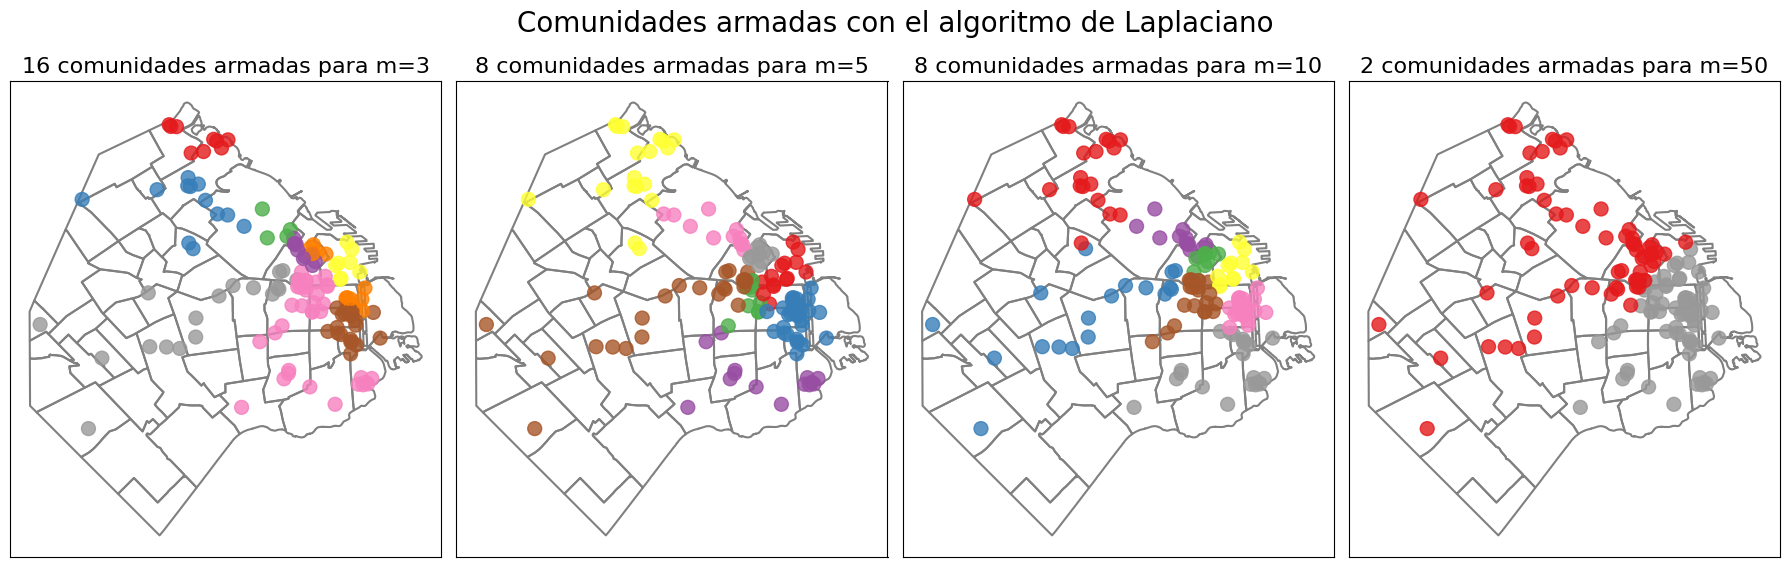

In [10]:
fig, axes = plt.subplots(1, len(M), figsize=(18, 6))

niveles = [4, 3, 3, 1]

for i, (m, nivel) in enumerate(zip(M, niveles)):
    A = simetrizar_A(construye_adyacencia(D, m))
    comunidades = laplaciano_iterativo(A, niveles=nivel)
    numero_de_comunidades = len(comunidades)
    graficar_particion(A, comunidades, titulo=f"{numero_de_comunidades} comunidades armadas para m={m}", ax=axes[i])

plt.suptitle("Comunidades armadas con el algoritmo de Laplaciano", fontsize=20)
plt.tight_layout()
plt.show()

### <u> Comparacion Laplaciano vs Modularidad: </u>

- Vemos que la zona del norte de CABA se subdivide en las particiones del Laplaciano. El bloque que estaba en la de modularidad, que abarcaba **Núñez, Belgrano, Coghlan, Saavedra, Villa Urquiza y Colegiales** termina dividido en dos comunidades distintas para `m=3`. A medida que se reduce la cantidad de comunidades este bloque se unifica de vuelta.

- La zona que habiamos mencionado de **La Boca y Barracas** ahora agrega a museos de los barrios de **Parque Patricios, Nueva Pompeya**, y lo mantiene en todas las iteraciones.

- La comunidad del oeste de la capital que observamos no solo se mantiene sino que se agranda como una diagonal que llega hasta el centro, donde hay más museos.

- En el caso de `m=2` vemos que las comunidades armadas son muy parecidas! (no son exactamente iguales, vemos que algunos puntos difieren)

- El método de Laplaciano parece tener una división de comunidades con un mayor orden geográfico que el método por modularidad. Esto es más visible en el centro, la zona más poblada de museos.